<a href="https://colab.research.google.com/github/Mart1n2015/MartinCerioli/blob/main/Predecir_Precios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install yfinance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU

In [2]:
#Cargar los datos
company = 'TSLA'
ticker = yf.Ticker(company)
hist = ticker.history(start = '2012-1-1', end='2020-1-1')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0.0,0.0
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0.0,0.0
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0.0,0.0
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0.0,0.0
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,120820500,0.0,0.0
2019-12-26 00:00:00-05:00,28.527332,28.898666,28.423332,28.729334,159508500,0.0,0.0
2019-12-27 00:00:00-05:00,29.000000,29.020666,28.407333,28.691999,149185500,0.0,0.0


In [4]:
#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(1952, 60, 1)

In [5]:
#Contruir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - loss: 0.0500
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0035
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0029
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0029
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0025
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0024
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 0.0023
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - loss: 0.0021
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.0023
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0019
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0020
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0017
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0018
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0015
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - l

In [6]:
#Cargar los datos del test
hist_test = ticker.history(start = '2020-1-1', end='2022-8-21')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [7]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step


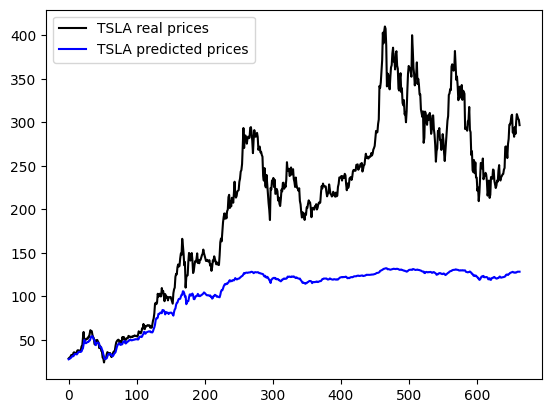

In [8]:
plt.plot(actual_prices,color="black",label=f"{company} real prices")
plt.plot(predicted_prices,color="blue",label=f"{company} predicted prices")
plt.legend()
plt.show()

In [9]:
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print((rentability-1)*100,"%")

-19.34049781391729 %
